In [19]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [34]:
X_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X_numpy.shape,y_numpy.shape

((100, 1), (100,))

In [35]:
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))

In [36]:
X.shape , y.shape

(torch.Size([100, 1]), torch.Size([100]))

In [37]:
y=y.view(y.shape[0],1)
y.shape

torch.Size([100, 1])

In [38]:
n_samples,n_features=X.shape
input_size=n_features
output_size=n_features

epoch 10 , loss = 4382.9746
epoch 20 , loss = 3270.1875
epoch 30 , loss = 2465.0188
epoch 40 , loss = 1881.8090
epoch 50 , loss = 1458.9543
epoch 60 , loss = 1152.0845
epoch 70 , loss = 929.1981
epoch 80 , loss = 767.1854
epoch 90 , loss = 649.3362
epoch 100 , loss = 563.5558
epoch 110 , loss = 501.0800
epoch 120 , loss = 455.5526
epoch 130 , loss = 422.3590
epoch 140 , loss = 398.1467
epoch 150 , loss = 380.4782
epoch 160 , loss = 367.5798
epoch 170 , loss = 358.1604
epoch 180 , loss = 351.2796
epoch 190 , loss = 346.2516
epoch 200 , loss = 342.5767


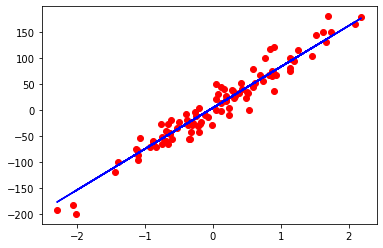

In [47]:
# 1- Model
model=nn.Linear(input_size,output_size)
#initialize weights and bias to zero
model.weight.data.fill_(0.0)
model.bias.data.fill_(0.0)


# 2- Loss and optimizer
loss_fn=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

#3 - Training Loop
num_epochs=200

for epoch in range(num_epochs):
    #forward pass and calculate loss
    y_pred=model(X)
    loss_val=loss_fn(y,y_pred)
    
    #backward loss
    loss_val.backward()
    
    #update weights
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f"epoch {epoch+1} , loss = {loss_val.item():.4f}")
        
predicted=model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,"ro")
plt.plot(X_numpy,predicted,"b")
        
    

In [45]:
model.weight*

Parameter containing:
tensor([[78.9809]], requires_grad=True)

In [48]:
model.bias

Parameter containing:
tensor([4.5550], requires_grad=True)